In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import ploting_func
from statsmodels.formula.api import ols

### Linear Model in Anthropology

In [2]:
df = pd.read_csv('femur_data.csv')

In [3]:
legs = df.iloc[:, 0]
legs = legs.values.reshape(len(legs),1)
heights = df.iloc[:, 1]
heights = heights.values.reshape(len(heights),1)

In [4]:
model = LinearRegression(fit_intercept=False)

In [5]:
model.fit(legs, heights)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

#### Use the fitted model to make a prediction for the found femur

In [6]:
fossil_leg = 50.7
fossil_height = model.predict([[fossil_leg]])
print("Predicted fossil height = {:0.2f} cm".format(fossil_height[0,0]))

Predicted fossil height = 181.34 cm


### Linear Model in Oceanography

In [7]:
df = pd.read_csv('sea_level_data.csv')

In [8]:
years = df.iloc[:, 0]
years = years.values.reshape(len(years),1)
levels = df.iloc[:, 1]
levels = levels.values.reshape(len(levels),1)

In [9]:
model = LinearRegression(fit_intercept=True)
model.fit(years, levels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Use model to make a prediction for one year, 2100

In [10]:
future_year = 2100
future_level = model.predict([[future_year]])
print("Prediction: year = {}, level = {:.02f}".format(future_year, future_level[0,0]))

Prediction: year = 2100, level = 16.66


#### Use model to predict for many years, and over-plot with measured data

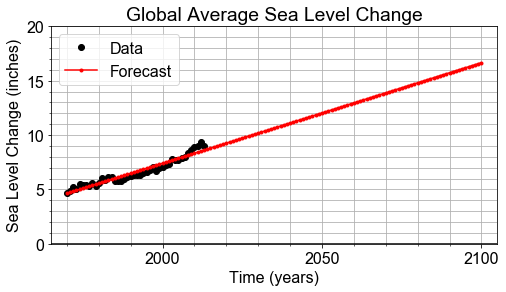

In [11]:
years_forecast = np.linspace(1970, 2100, 131).reshape(-1, 1)
levels_forecast = model.predict(years_forecast)
fig = ploting_func.plot_data_and_forecast(years, levels, years_forecast, levels_forecast)

### Linear Model in Cosmology

Build a model whose slope will give Hubble's Constant, which describes the velocity of galaxies as a linear function of distance from Earth.

In [12]:
df = pd.read_csv('hubble_data.csv')

In [13]:
model_fit = ols(formula="velocities ~ distances", data=df).fit()

#### Extract the model parameters and associated "errors" or uncertainties

In [14]:
a0 = model_fit.params['Intercept']
a1 = model_fit.params['distances']
e0 = model_fit.bse['Intercept']
e1 = model_fit.bse['distances']

In [15]:
print('For slope a1={:.02f}, the uncertainty in a1 is {:.02f}'.format(a1, e1))
print('For intercept a0={:.02f}, the uncertainty in a0 is {:.02f}'.format(a0, e0))

For slope a1=454.16, the uncertainty in a1 is 75.24
For intercept a0=-40.78, the uncertainty in a0 is 83.44
